# Imports

In [1]:
import numpy as np
import pandas as pd
from dtreeviz.trees import dtreeviz
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

# Data tokenization

In [9]:

from nltk.corpus import stopwords
# ‘english’
def get_boolean_representation(corpus, stop_words_list='english'):
    vectorizer = CountVectorizer(binary=True, stop_words=stop_words_list)
    X = vectorizer.fit_transform(corpus)
    vocabulary = vectorizer.get_feature_names_out()
    return X.toarray(), vocabulary

def get_tf_representation(corpus, stop_words_list='english'):
    vectorizer = CountVectorizer(binary=False, stop_words=stop_words_list)
    X = vectorizer.fit_transform(corpus)
    vectorizer.get_feature_names_out()
    return X.toarray()

def get_tf_idf_representation(corpus, stop_words_list='english'):
    vectorizer = TfidfVectorizer(stop_words=stop_words_list)
    X = vectorizer.fit_transform(corpus)
    vectorizer.get_feature_names_out()
    return X.toarray()

# Decision tree

In [3]:
index_train = np.load('../data/array_idx_train.npy')
index_val = np.load('../data/array_idx_val.npy')

df = pd.read_csv('../data/DataFrame_train_full_preprocessing.csv')

representation_boolean, vocabulary = get_boolean_representation(df['text'].apply(lambda x : x.lower()))
representation_tf = get_tf_representation(df['text'].apply(lambda x : x.lower()))
representation_tf_idf = get_tf_idf_representation(df['text'].apply(lambda x : x.lower()))

y_train = df.loc[index_train, 'label']
y_val = df.loc[index_val, 'label']

del df

x_train_boolean = representation_boolean[index_train]
x_val_boolean = representation_boolean[index_val]

x_train_tf = representation_tf[index_train]
x_val_tf = representation_tf[index_val]

x_train_tf_idf = representation_tf_idf[index_train]
x_val_tf_idf = representation_tf_idf[index_val]

# Cross-validation

In [6]:
parameters_to_tune = {'criterion' : ('gini', 'entropy'),
                      'splitter' : ('best', 'random'),
                      'max_depth' : [3, 4, 5, 6, 10],
                      'max_features' : [0.25, 0.5, 0.75, None],
                      'class_weight' : ['balanced', None]
                      }

model_to_tune = DecisionTreeClassifier(random_state=0)
model = GridSearchCV(model_to_tune, parameters_to_tune, scoring='roc_auc', verbose=2).fit(x_train_tf, y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
[CV] END class_weight=balanced, criterion=gini, max_depth=3, max_features=0.25, splitter=best; total time=   2.6s
[CV] END class_weight=balanced, criterion=gini, max_depth=3, max_features=0.25, splitter=best; total time=   1.4s
[CV] END class_weight=balanced, criterion=gini, max_depth=3, max_features=0.25, splitter=best; total time=   0.9s
[CV] END class_weight=balanced, criterion=gini, max_depth=3, max_features=0.25, splitter=best; total time=   1.0s
[CV] END class_weight=balanced, criterion=gini, max_depth=3, max_features=0.25, splitter=best; total time=   0.9s
[CV] END class_weight=balanced, criterion=gini, max_depth=3, max_features=0.25, splitter=random; total time=   0.9s
[CV] END class_weight=balanced, criterion=gini, max_depth=3, max_features=0.25, splitter=random; total time=   0.9s
[CV] END class_weight=balanced, criterion=gini, max_depth=3, max_features=0.25, splitter=random; total time=   0.9s
[CV] END class_weig

AttributeError: 'GridSearchCV' object has no attribute 'best_params'

In [7]:
print('Best score', model.best_score_, 'for parameters', model.best_params_)
print(model.cv_results_)

Best score 0.9523407046401822 for parameters {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 5, 'max_features': 0.5, 'splitter': 'best'}
{'mean_fit_time': array([1.32764125, 0.82200475, 1.34732914, 1.18659587, 1.73839297,
       1.81229839, 2.35417981, 2.34618134, 1.22582994, 1.21664495,
       2.03163962, 2.42668471, 2.92107248, 2.12988586, 2.83155689,
       2.32584128, 1.10502415, 1.26776648, 1.77573915, 1.64352679,
       2.34810119, 2.21716456, 2.97388387, 3.91696672, 2.02597589,
       2.03164601, 2.60302815, 2.21960306, 2.84154439, 2.74226489,
       3.65432653, 3.34647098, 1.73012466, 1.6511291 , 3.08330851,
       2.81738362, 4.0808847 , 3.90131254, 5.60847335, 4.94814887,
       0.87019615, 0.82160783, 1.32973518, 1.25468273, 1.81422958,
       1.70864663, 2.25496111, 2.1255434 , 0.99772077, 0.93825521,
       1.57653923, 1.50997357, 2.15953131, 2.04944501, 2.80157647,
       2.59923248, 1.13151503, 1.07925248, 1.89203691, 1.77211242,
       2.58173437, 2.41992

# Boolean representation

In [8]:
model = DecisionTreeClassifier(random_state=0,  criterion = 'entropy', max_depth = 5, max_features = 0.75, class_weight= 'balanced', splitter = 'best').fit(x_train_boolean, y_train)
y_predict = model.predict(x_val_boolean)

acc = accuracy_score(y_val, y_predict)
aucroc = roc_auc_score(y_val, y_predict)

print('**Boolean representation**')
print('accuracy', acc, 'auc-roc', aucroc)

**Boolean representation**
accuracy 0.9675 auc-roc 0.95359477124183


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


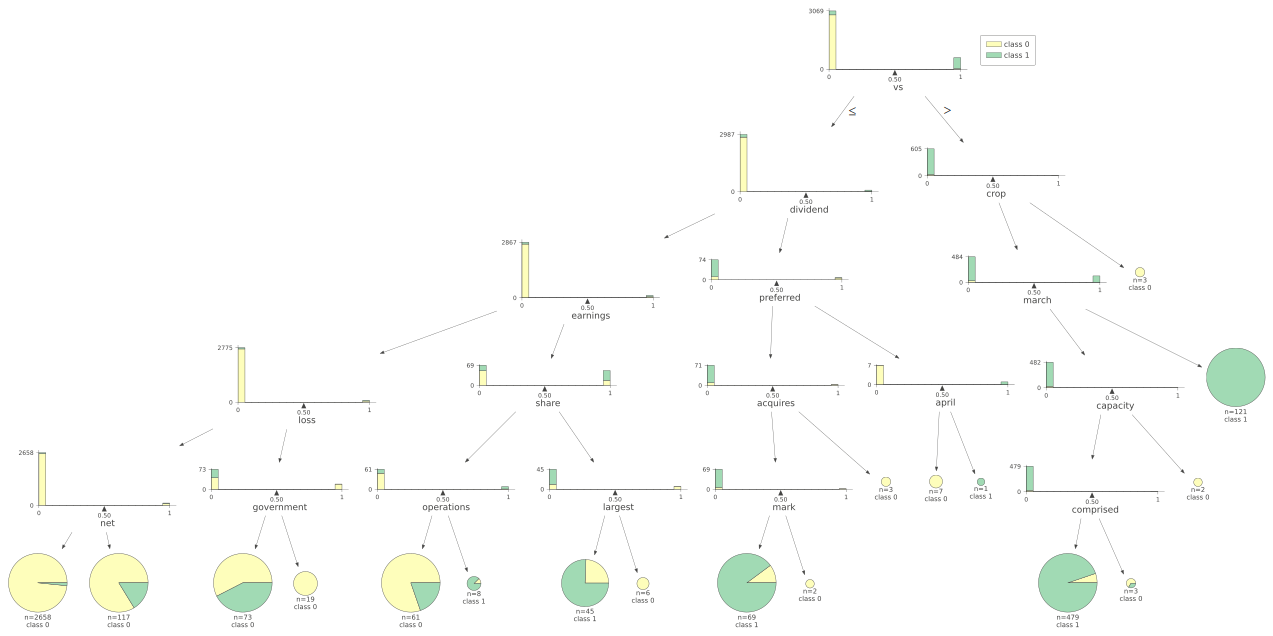

In [5]:
model = DecisionTreeClassifier(random_state=0,  criterion = 'entropy', max_depth = 5, max_features = 0.75, splitter = 'best').fit(x_train_boolean, y_train)
y_predict = model.predict(x_val_boolean)

visualisation = dtreeviz(model, x_train_boolean, y_train, feature_names=vocabulary)
visualisation

/home/thibaud/.local/lib/python3.8/site-packages/dtreeviz/trees.py:1032: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(*overall_feature_range_wide)


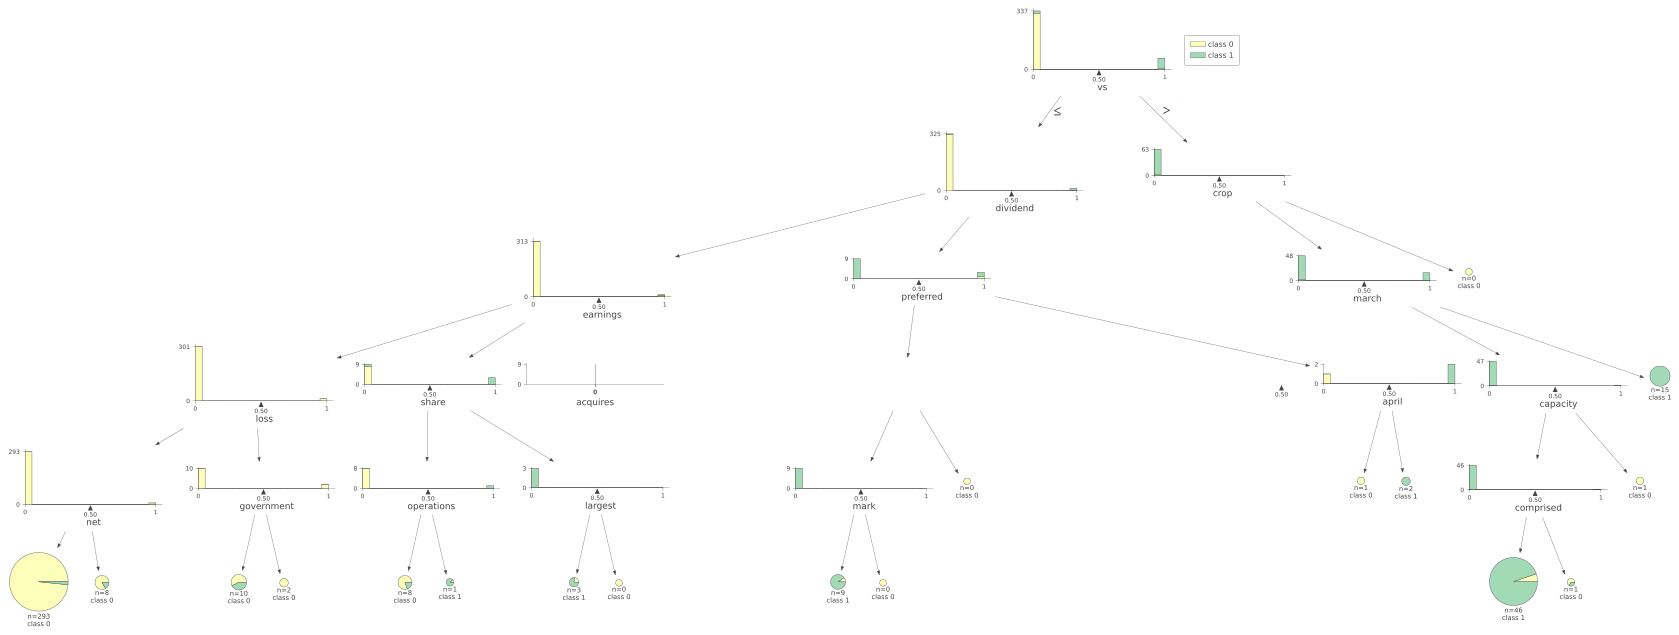

In [6]:
visualisation = dtreeviz(model, x_val_boolean, y_predict, feature_names=vocabulary)
visualisation

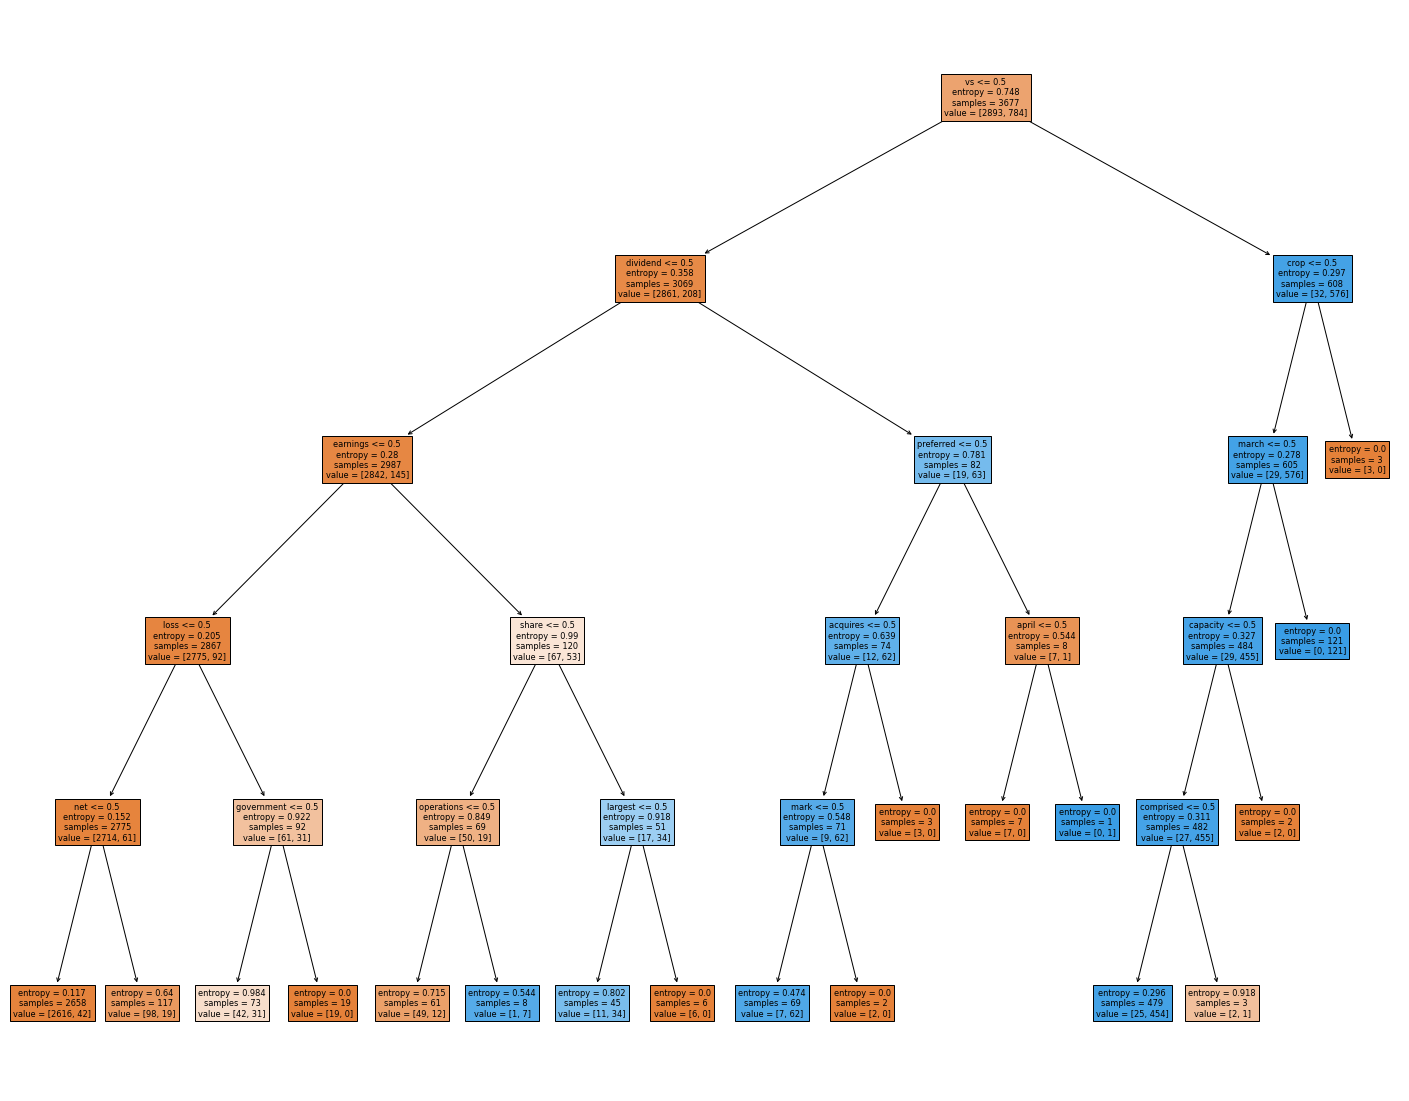

In [7]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
                   feature_names=vocabulary,
                   filled=True)

# TF representation

In [40]:
model = DecisionTreeClassifier(random_state=0, criterion = 'gini', max_depth = 4, max_features = 0.75, class_weight= 'balanced', splitter = 'best').fit(x_train_tf, y_train)
y_predict = model.predict(x_val_tf)

acc = accuracy_score(y_val, y_predict)
aucroc = roc_auc_score(y_val, y_predict)

print('**TF representation**')
print('accuracy', acc, 'auc-roc', aucroc)

**TF representation**
accuracy 0.95 auc-roc 0.9510737628384687


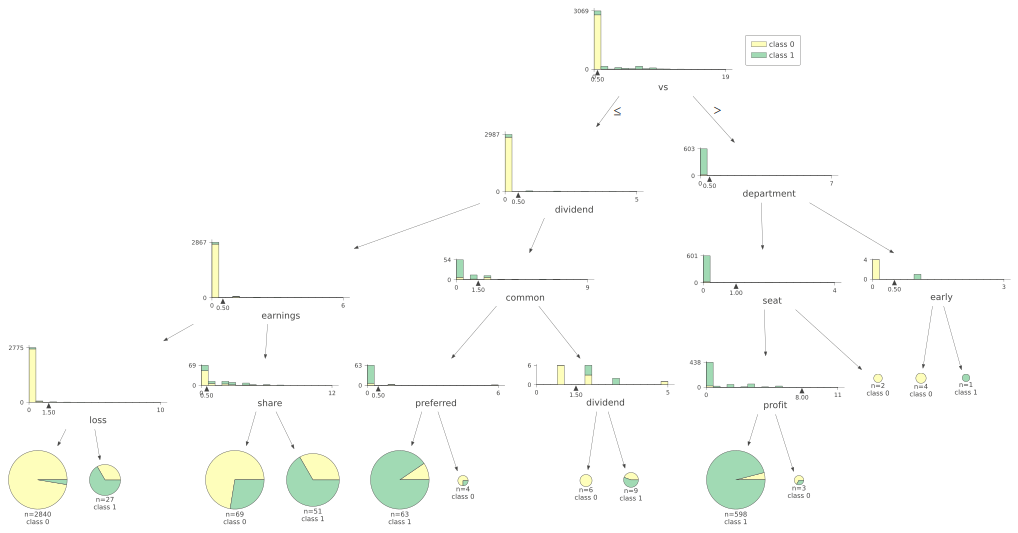

In [41]:
model = DecisionTreeClassifier(random_state=0, criterion = 'gini', max_depth = 4, max_features = 0.75, splitter = 'best').fit(x_train_tf, y_train)
y_predict = model.predict(x_val_tf)

visualisation = dtreeviz(model, x_train_tf, y_train, feature_names=vocabulary)
visualisation

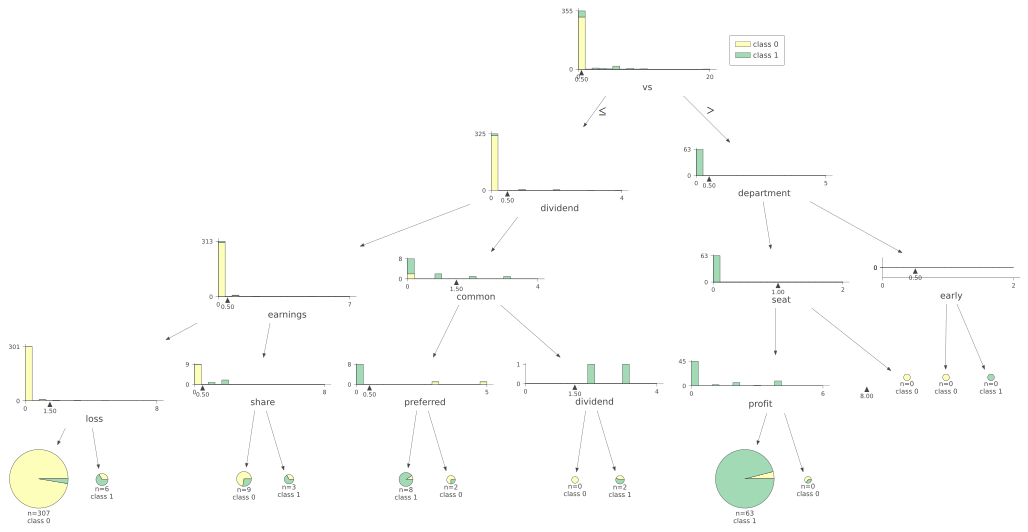

In [42]:
visualisation = dtreeviz(model, x_val_tf, y_predict, feature_names=vocabulary)
visualisation

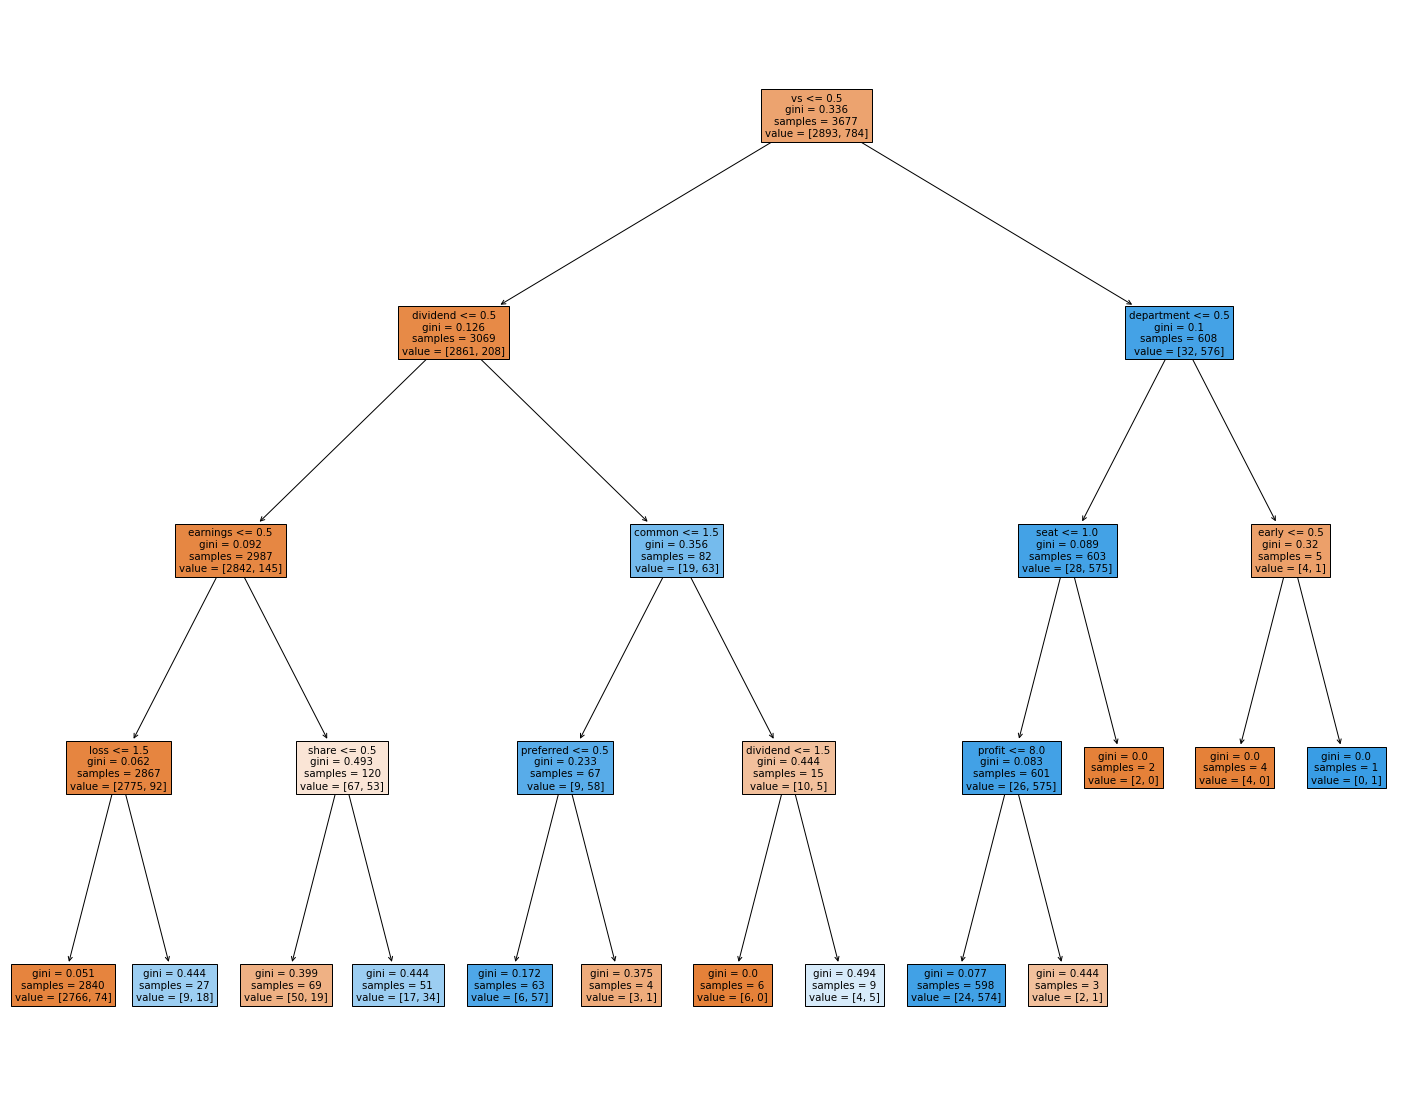

In [43]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
                   feature_names=vocabulary,
                   filled=True)

# TF-IDF representation

In [44]:
model = DecisionTreeClassifier(random_state=0, criterion = 'gini', max_depth = 4, max_features = 0.75, class_weight= 'balanced', splitter = 'best').fit(x_train_tf_idf, y_train)
y_predict = model.predict(x_val_tf_idf)

acc = accuracy_score(y_val, y_predict)
aucroc = roc_auc_score(y_val, y_predict)

print('**TF-IDF representation**')
print('accuracy', acc, 'auc-roc', aucroc)

**TF-IDF representation**
accuracy 0.9525 auc-roc 0.9483660130718955


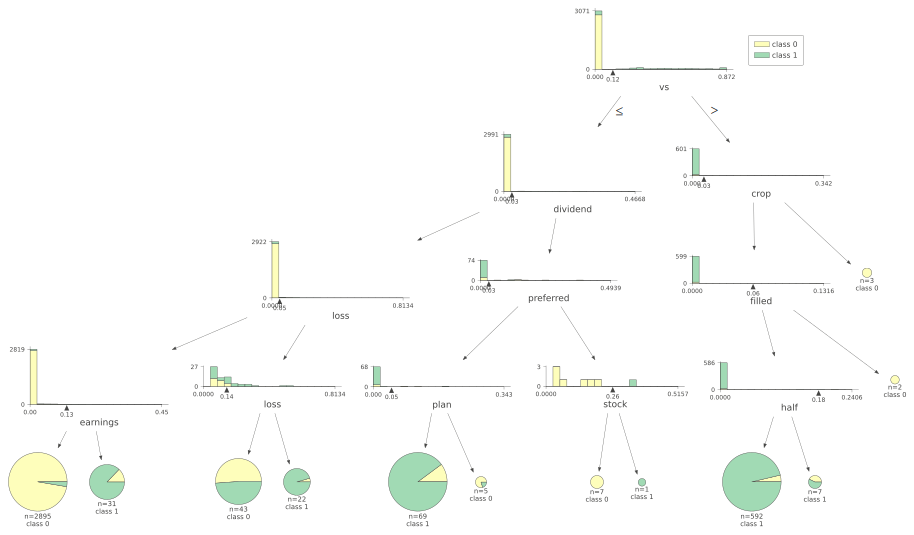

In [45]:
model = DecisionTreeClassifier(random_state=0, criterion = 'gini', max_depth = 4, max_features = 0.75, splitter = 'best').fit(x_train_tf_idf, y_train)
y_predict = model.predict(x_val_tf_idf)

visualisation = dtreeviz(model, x_train_tf_idf, y_train, feature_names=vocabulary)
visualisation

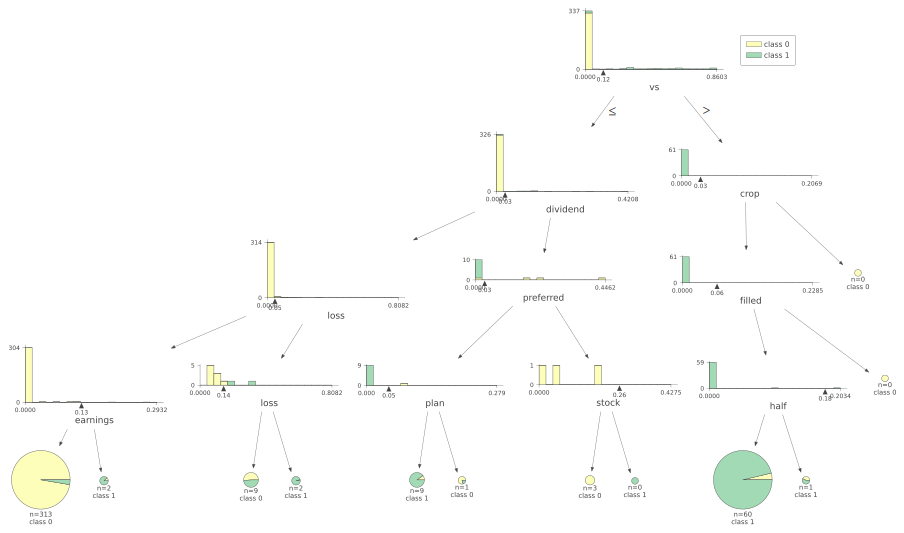

In [46]:
visualisation = dtreeviz(model, x_val_tf_idf, y_predict, feature_names=vocabulary)
visualisation

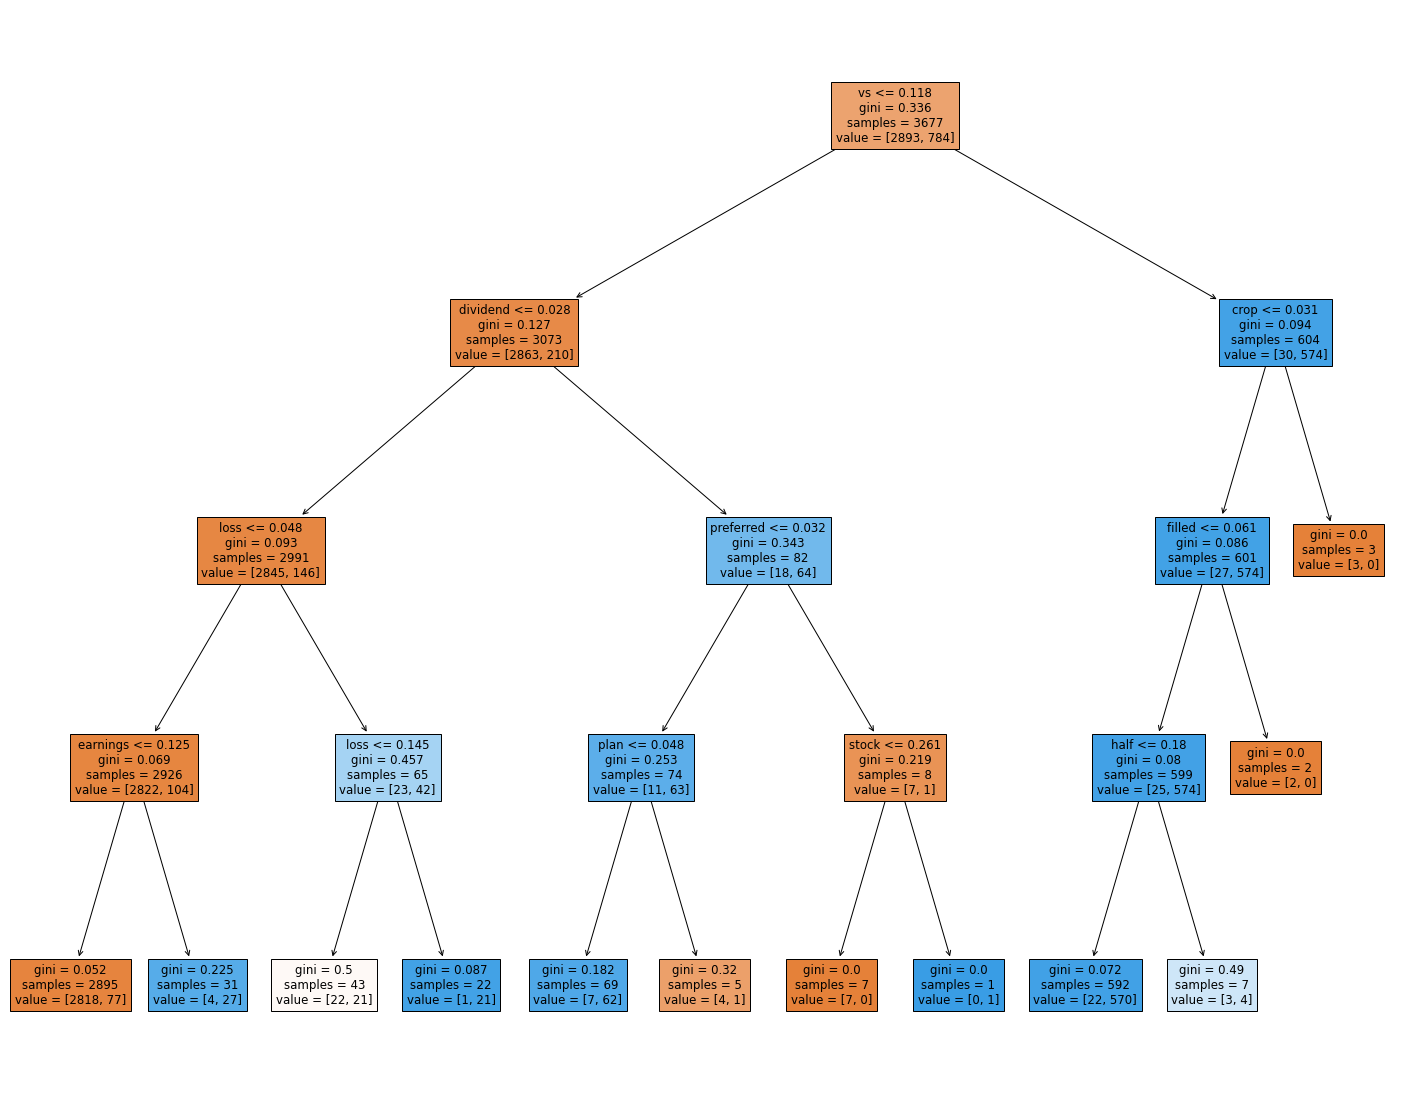

In [47]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,
                   feature_names=vocabulary,
                   filled=True)